C:\Users\Admin\AppData\Local\Temp\ipykernel_3520\2797413242.py:8: DeprecationWarning: Please use `pearsonr` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.
  from scipy.stats.stats import pearsonr


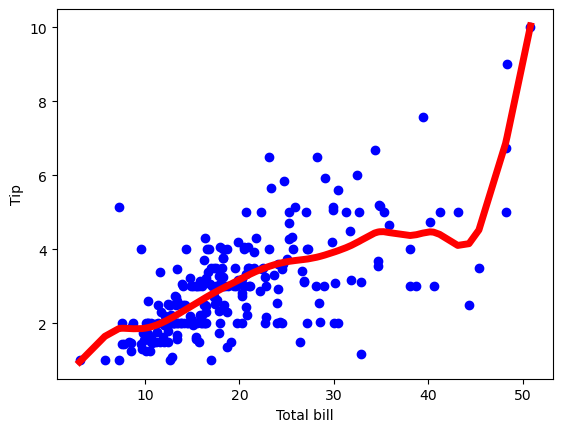

The Data Set ( 10 Samples) X :
 [-2.99399399 -2.98798799 -2.98198198 -2.97597598 -2.96996997 -2.96396396
 -2.95795796 -2.95195195 -2.94594595]
The Fitting Curve Data Set (10 Samples) Y:
 [2.13582188 2.13156806 2.12730467 2.12303166 2.11874898 2.11445659
 2.11015444 2.10584249 2.10152068]
Normalised (10 Samples) X :
 [-3.08419915 -3.0749543  -2.8694385  -3.09491717 -2.80570267 -3.05402604
 -2.89411877 -2.9848138  -2.8856272 ]
 Xo Domain Space(10 Samples) :
 [-2.97993311 -2.95986622 -2.93979933 -2.91973244 -2.89966555 -2.87959866
 -2.85953177 -2.83946488 -2.81939799]


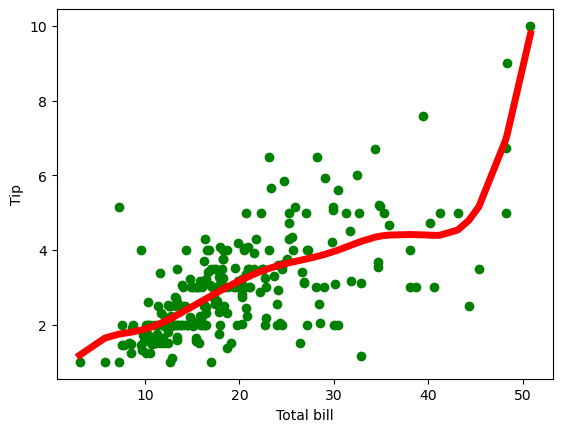

In [10]:
from numpy import * 
from os import listdir 
import matplotlib 
import matplotlib.pyplot as plt 
import pandas as pd 
import numpy as np1 
import numpy.linalg as np 
from scipy.stats.stats import pearsonr

def kernel(point,xmat, k):
    m,n = np1.shape(xmat) 
    weights = np1.mat(np1.eye((m))) 
    for j in range(m): 
        diff = point - X[j] 
        weights[j,j] = np1.exp(diff*diff.T/(-2.0*k**2)) 
    return weights
  
def localWeight(point,xmat,ymat,k): 
    wei = kernel(point,xmat,k) 
    W = (X.T*(wei*X)).I*(X.T*(wei*ymat.T)) 
    return W
  
def localWeightRegression(xmat,ymat,k):
    m,n = np1.shape(xmat) 
    ypred = np1.zeros(m) 
    for i in range(m): 
        ypred[i] = xmat[i]*localWeight(xmat[i],xmat,ymat,k) 
    return ypred
  
  #load data points 
data = pd.read_csv('tips.csv') 
bill = np1.array(data.total_bill) 
tip = np1.array(data.tip)

#preparing and add 1 in bill 
mbill = np1.mat(bill) 
mtip = np1.mat(tip) 
# mat is used to convert to n dimesiona to 2 dimensional array form 
m= np1.shape(mbill)[1] # print(m) 244 data is stored in m 
one = np1.mat(np1.ones(m)) 
X= np1.hstack((one.T,mbill.T)) # create a stack of bill from ONE 
# print(X) 
#set k here 
ypred = localWeightRegression(X,mtip,2) 
SortIndex = X[:,1].argsort(0)

xsort = X[SortIndex][:,0] 
fig = plt.figure() 
ax = fig.add_subplot(1,1,1) 
ax.scatter(bill,tip, color='blue') 
ax.plot(xsort[:,1],ypred[SortIndex], color = 'red', linewidth=5) 
plt.xlabel('Total bill') 
plt.ylabel('Tip') 
plt.show();

import numpy as np 
from bokeh.plotting import figure, show, output_notebook 
from bokeh.layouts import gridplot 
from bokeh.io import push_notebook

def local_regression(x0, X, Y, tau):
    # add bias term 
    x0 = np.r_[1, x0] 
    # Add one to avoid the loss in information 
    X = np.c_[np.ones(len(X)), X] 
    # fit model: normal equations with kernel 
    xw = X.T * radial_kernel(x0, X, tau) # XTranspose * W 
    beta = np.linalg.pinv(xw @ X) @ xw @ Y #@ Matrix Multiplication or Dot Product
    return x0 @ beta # @ Matrix Multiplication or Dot Product for prediction
  
def radial_kernel(x0, X, tau):
    return np.exp(np.sum((X - x0) ** 2, axis=1) / (-2 * tau * tau))
# Weight or Radial Kernal Bias Function

n = 1000
# generate dataset
X = np.linspace(-3, 3, num=n)
print("The Data Set ( 10 Samples) X :\n",X[1:10]) 
Y = np.log(np.abs(X ** 2 - 1) + .5)
print("The Fitting Curve Data Set (10 Samples) Y:\n",Y[1:10])
# jitter X
X += np.random.normal(scale=.1, size=n) 
print("Normalised (10 Samples) X :\n",X[1:10])

domain = np.linspace(-3, 3, num=300)
print(" Xo Domain Space(10 Samples) :\n",domain[1:10]) 

def plot_lwr(tau):
    # prediction through regression
    prediction = [local_regression(x0, X, Y, tau) for x0 in domain]
    plot = figure(plot_width=400, plot_height=400) 
    plot.title.text='tau=%g' % tau
    plot.scatter(X, Y, alpha=.3)
    plot.line(domain, prediction, line_width=2, color='red')
    return plot

show(gridplot([[plot_lwr(10.), plot_lwr(1.)],
[plot_lwr(0.1), plot_lwr(0.01)]]))

import matplotlib.pyplot as plt 
import pandas as pd
import numpy as np

def kernel(point,xmat, k): 
    m,n = np.shape(xmat)
    weights = np.mat(np.eye((m))) # eye - identity matrix 
    for j in range(m):
        diff = point - X[j]
        weights[j,j] = np.exp(diff*diff.T/(-2.0*k**2)) 
    return weights

def localWeight(point,xmat,ymat,k): 
    wei = kernel(point,xmat,k)
    W = (X.T*(wei*X)).I*(X.T*(wei*ymat.T)) 
    return W

def localWeightRegression(xmat,ymat,k): 
    m,n = np.shape(xmat)
    ypred = np.zeros(m) 
    for i in range(m):
        ypred[i] = xmat[i]*localWeight(xmat[i],xmat,ymat,k) 
    return ypred

def graphPlot(X,ypred):
    sortindex = X[:,1].argsort(0) #argsort - index of the smallest 
    xsort = X[sortindex][:,0]
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1) 
    ax.scatter(bill,tip, color='green')
    ax.plot(xsort[:,1],ypred[sortindex], color = 'red', linewidth=5) 
    plt.xlabel('Total bill')
    plt.ylabel('Tip') 
    plt.show();

# load data points
data = pd.read_csv('tips.csv')
bill = np.array(data.total_bill) # We use only Bill amount and Tips data 
tip = np.array(data.tip)

mbill = np.mat(bill) # .mat will convert nd array is converted in 2D array 
mtip = np.mat(tip)
m= np.shape(mbill)[1] 
one = np.mat(np.ones(m))
X = np.hstack((one.T,mbill.T)) # 244 rows, 2 cols

# increase k to get smooth curves
ypred = localWeightRegression(X,mtip,3) 
graphPlot(X,ypred)

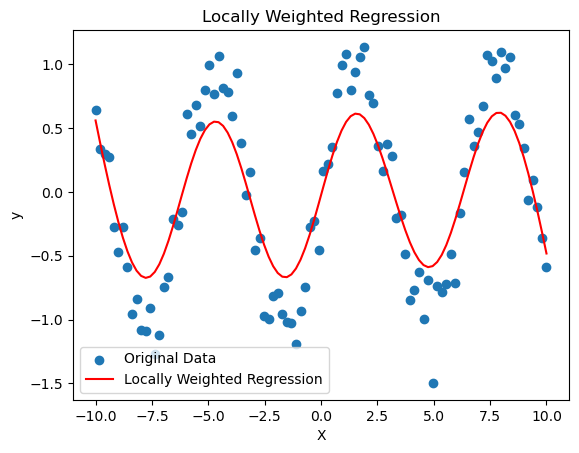

In [6]:
import numpy as np
import matplotlib.pyplot as plt

def locally_weighted_regression(X, y, query, tau):
    m = X.shape[0]  # Number of training examples
    X = np.hstack((np.ones((m, 1)), X))  # Add bias term

    # Calculate weights using the Gaussian kernel
    weights = np.exp(-np.sum((X[:, 1:] - query) ** 2, axis=1) / (2 * tau ** 2))

    # Calculate the weighted least squares solution
    theta = np.linalg.inv(X.T.dot(np.diag(weights)).dot(X)).dot(X.T).dot(np.diag(weights)).dot(y)

    # Predict the output for the query point
    query = np.hstack((1, query))
    prediction = query.dot(theta)
    return prediction

# Generate synthetic dataset for regression
np.random.seed(42)
X = np.linspace(-10, 10, 100).reshape(-1, 1)
y = np.sin(X) + np.random.normal(0, 0.2, size=X.shape)

# Define query points for prediction
queries = np.linspace(-10, 10, 100).reshape(-1, 1)

# Define bandwidth parameter (tau)
tau = 1.0

# Perform locally weighted regression for each query point
predictions = np.zeros_like(queries)
for i, query in enumerate(queries):
    predictions[i] = locally_weighted_regression(X, y, query, tau)

# Plot the original data and the predicted curve
plt.scatter(X, y, label='Original Data')
plt.plot(queries, predictions, color='red', label='Locally Weighted Regression')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Locally Weighted Regression')
plt.legend()
plt.show()
